# Jores et al 2021 Intepretation
**Authorship:**
Adam Klie, *08/12/2022*
***
**Description:**
Notebook to interpret the best trained models on the Jores et al dataset.
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/kipoi_veff/seqplotting_deps.py:36: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/kipoi_veff/seqplotting_deps.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/jores21"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jores21"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/jores21"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/jores21"
eu.settings.figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/jores21"
eu.settings.verbosity = logging.ERROR
eu.settings.batch_size = 128
eu.settings.dl_num_workers = 0

# Load in the `leaf`, `proto` and `combined` test `SeqData`s 

In [3]:
# Load in the preprocessed training data
sdata_leaf = eu.dl.read(os.path.join(eu.settings.output_dir, "leaf_test_predictions.h5sd"))
sdata_proto = eu.dl.read(os.path.join(eu.settings.output_dir, "proto_test_predictions.h5sd"))
sdata_combined = eu.dl.read(os.path.join(eu.settings.output_dir, "combined_test_predictions.h5sd"))
sdata_leaf, sdata_proto, sdata_combined

(SeqData object with = 7154 seqs
 seqs = (7154,)
 names = (7154,)
 rev_seqs = (7154,)
 ohe_seqs = (7154, 170, 4)
 ohe_rev_seqs = (7154, 170, 4)
 seqs_annot: 'GC', 'Jores21CNN_trial_1_enrichment_predictions', 'Jores21CNN_trial_2_enrichment_predictions', 'Jores21CNN_trial_3_enrichment_predictions', 'Jores21CNN_trial_4_enrichment_predictions', 'Jores21CNN_trial_5_enrichment_predictions', 'barcodes', 'batch', 'chromosome', 'end', 'enrichment', 'gene', 'mutations', 'set', 'sp', 'ssCNN_trial_1_enrichment_predictions', 'ssCNN_trial_2_enrichment_predictions', 'ssCNN_trial_3_enrichment_predictions', 'ssCNN_trial_4_enrichment_predictions', 'ssCNN_trial_5_enrichment_predictions', 'ssHybrid_trial_1_enrichment_predictions', 'ssHybrid_trial_2_enrichment_predictions', 'ssHybrid_trial_3_enrichment_predictions', 'ssHybrid_trial_4_enrichment_predictions', 'ssHybrid_trial_5_enrichment_predictions', 'start', 'strand', 'type'
 pos_annot: None
 seqsm: None
 uns: None,
 SeqData object with = 7595 seqs
 seqs 

# Load the best model

In [4]:
leaf_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "ssHybrid", f"leaf_trial_5", "checkpoints", "*"))[0]
leaf_model = eu.models.Hybrid.load_from_checkpoint(leaf_model_file)
leaf_model

Hybrid(
  (hp_metric): R2Score()
  (convnet): BasicConv1D(
    (module): Sequential(
      (0): Conv1d(4, 256, kernel_size=(13,), stride=(1,))
      (1): ReLU()
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.3, inplace=False)
      (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv1d(256, 256, kernel_size=(13,), stride=(1,))
      (6): ReLU()
      (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Dropout(p=0.3, inplace=False)
      (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): Conv1d(256, 256, kernel_size=(13,), stride=(1,))
      (11): ReLU()
      (12): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (13): Dropout(p=0.3, inplace=False)
      (14): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (recurren

In [5]:
proto_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "Jores21CNN", f"proto_trial_5", "checkpoints", "*"))[0]
proto_model = eu.models.Jores21CNN.load_from_checkpoint(proto_model_file)
proto_model

Jores21CNN(
  (hp_metric): R2Score()
  (biconv): BiConv1D(
    (kernels): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 256x4x13]
        (1): Parameter containing: [torch.FloatTensor of size 256x256x13]
        (2): Parameter containing: [torch.FloatTensor of size 256x256x13]
    )
    (biases): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 256]
        (1): Parameter containing: [torch.FloatTensor of size 256]
        (2): Parameter containing: [torch.FloatTensor of size 256]
    )
  )
  (conv): Conv1d(256, 256, kernel_size=(13,), stride=(1,), padding=same)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=43520, out_features=64, bias=True)
  (batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [6]:
combined_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "Jores21CNN", f"combined_trial_3", "checkpoints", "*"))[0]
combined_model = eu.models.Jores21CNN.load_from_checkpoint(combined_model_file)
combined_model

Jores21CNN(
  (hp_metric): R2Score()
  (biconv): BiConv1D(
    (kernels): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 256x4x13]
        (1): Parameter containing: [torch.FloatTensor of size 256x256x13]
        (2): Parameter containing: [torch.FloatTensor of size 256x256x13]
    )
    (biases): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 256]
        (1): Parameter containing: [torch.FloatTensor of size 256]
        (2): Parameter containing: [torch.FloatTensor of size 256]
    )
  )
  (conv): Conv1d(256, 256, kernel_size=(13,), stride=(1,), padding=same)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=43520, out_features=64, bias=True)
  (batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [129]:
# Choose which model you want to use
name = "leaf"
model = leaf_model
sdata = sdata_leaf

# Feature attribution

In [130]:
saliency_methods = ["InputXGradient", "DeepLift", "GradientSHAP"]
for method in saliency_methods:
    eu.interpret.feature_attribution(
        model,
        sdata,
        saliency_method=method
    )

No transforms given, assuming just need to tensorize).


Computing saliency on batches:   0%|          | 0/55 [00:00<?, ?it/s]

No transforms given, assuming just need to tensorize).


Computing saliency on batches:   0%|          | 0/55 [00:00<?, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/captum/attr/_core/deep_lift.py:471: UserWarning: An invalid module MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) is detected. Saved gradients will
                be used as the gradients of the module's input tensor.
                See MaxPool1d as an example.
  module
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/torch/nn/functional.py:651: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool1d in a future release.
  warnings.warn("Note t

No transforms given, assuming just need to tensorize).


Computing saliency on batches:   0%|          | 0/55 [00:00<?, ?it/s]

In [135]:
# Grab the top10 in terms of predictions
top5 = sdata["ssHybrid_trial_5_enrichment_predictions"].sort_values(ascending=False).iloc[:5].index

In [136]:
sdata["ssHybrid_trial_5_enrichment_predictions"].sort_values(ascending=False)

seq001429    4.273413
seq002464    4.251174
seq004623    4.242254
seq004256    4.220821
seq000702    4.179044
               ...   
seq003560   -2.471391
seq006987   -2.471972
seq003437   -2.496191
seq003407   -2.564916
seq007079   -2.581780
Name: ssHybrid_trial_5_enrichment_predictions, Length: 7154, dtype: float64

In [138]:
top5

Index(['seq001429', 'seq002464', 'seq004623', 'seq004256', 'seq000702'], dtype='object')

In [ ]:
eu.interpret.feature_attribution(
    model,
    sdata,
    saliency_method="NaiveISM"
)

Note: NaiveISM is not implemented yet for models other than single stranded ones
No transforms given, assuming just need to tensorize).


Computing saliency on batches:   0%|          | 0/55 [00:00<?, ?it/s]

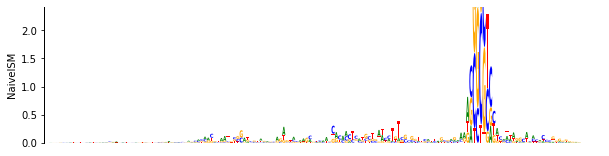

In [153]:
eu.pl.lm_seq_track(
    sdata,
    seq_id=top5[0],
    uns_key = "InputXGradient_imps",
    ylabel="InputXGradient",
#    save=os.path.join(eu.settings.figure_dir, f"{name}_best_model_feature_attr.pdf")
)

Importance values: 0it [00:00, ?it/s]

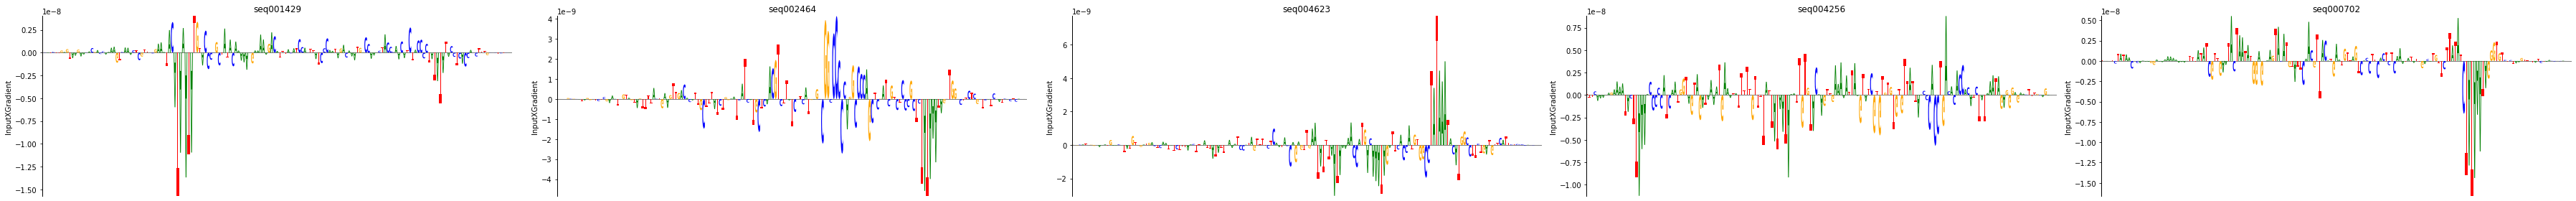

In [148]:
eu.pl.lm_multiseq_track(
    sdata,
    seq_ids=top5,
    uns_keys = "InputXGradient_imps",
    ylabels="InputXGradient",
    width=70,
    save=os.path.join(eu.settings.figure_dir, f"{name}_best_model_feature_attr.pdf")
)

# Filter viz

In [156]:
eu.interpret.generate_pfms(model, sdata)

No transforms given, assuming just need to tensorize).


Getting maximial activating seqlets:   0%|          | 0/55 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/256 [00:00<?, ?it/s]

In [162]:
conv_mod = next(model.convnet.modules())
first_conv = conv_mod.module[0]
filters = first_conv.weight.data

In [170]:
filters[0]

tensor([[ 3.2627e-01,  6.6034e-01,  7.8357e-01,  4.0481e-01, -1.0975e-01,
          3.8955e+00, -1.7021e-01,  3.9925e+00,  2.4412e+00,  3.8843e+00,
          1.2135e+00,  2.8155e+00,  4.2649e-01],
        [ 1.5911e+00,  1.5924e+00,  1.2437e+00,  2.7814e+00,  9.3960e-03,
          4.3094e-02,  1.0885e-02,  2.6274e-02,  5.3457e-02,  1.7390e-03,
          1.0796e-01,  3.3877e-01,  1.7005e+00],
        [ 5.4844e-01,  7.2295e-01,  9.1353e-01,  2.1773e-01,  1.5325e-02,
         -9.1144e-02,  9.6944e-02,  1.9689e-02,  3.6463e-02,  5.2349e-02,
          9.6406e-02,  3.6530e-01,  1.2508e+00],
        [ 1.4227e+00,  9.1231e-01,  9.5777e-01,  4.1811e-01,  3.9597e+00,
          8.5265e-03,  3.9238e+00, -1.6815e-01,  1.3546e+00, -5.7627e-02,
          2.4594e+00,  3.5833e-01,  5.0175e-01]], device='cuda:0')

In [126]:
def pwm_to_meme(pwm, output_file_path):
    """
    Function to convert pwm array to meme file
    :param pwm: numpy.array, pwm matrices, shape (U, 4, filter_size), where U - number of units
    :param output_file_path: string, the name of the output meme file
    """

    n_filters = pwm.shape[0]
    filter_size = pwm.shape[2]
    meme_file = open(output_file_path, 'w')
    meme_file.write("MEME version 4\n\n")
    meme_file.write("ALPHABET= ACGT\n\n")
    meme_file.write("strands: + -\n\n")
    meme_file.write("Background letter frequencies\n")
    meme_file.write("A 0.25 C 0.25 G 0.25 T 0.25\n")

    print('Saved PWM File as : {}'.format(output_file_path))

    for i in range(0, n_filters):
        if np.sum(pwm[i, :, :]) > 0:
            meme_file.write("\n")
            meme_file.write("MOTIF filter%s\n" % i)
            meme_file.write(
                "letter-probability matrix: alength= 4 w= %d \n" % np.count_nonzero(np.sum(pwm[i, :, :], axis=0)))

        for j in range(0, filter_size):
            if np.sum(pwm[i, :, j]) > 0:
                meme_file.write(str(pwm[i, 0, j]) + "\t" + str(pwm[i, 1, j]) + "\t" + str(pwm[i, 2, j]) + "\t" + str(
                    pwm[i, 3, j]) + "\n")

    meme_file.close()

In [57]:
import seqlogo
import logomaker as lm

In [127]:
pwms = []
for pfm in sdata.uns["pfms"].values():
    pwms.append(pfm.values/pfm.values.sum(axis=1, keepdims=1))
pwms = np.array(pwms).transpose(0,2,1)

In [114]:
pwms.shape

(256, 4, 13)

In [115]:
pwms[1]

array([[0.93418567, 0.24278315, 0.26494897, 0.3397495 , 0.25620602,
        0.27306808, 0.27476624, 0.27287429, 0.28083433, 0.26330989,
        0.26736314, 0.26648493, 0.27049253],
       [0.02530023, 0.2862146 , 0.35237106, 0.22282834, 0.29464632,
        0.28795573, 0.27910961, 0.28106951, 0.27853171, 0.27705788,
        0.27588477, 0.27900259, 0.27328825],
       [0.01520263, 0.16811551, 0.17615699, 0.15052821, 0.22204208,
        0.21156518, 0.2105568 , 0.19455759, 0.19629866, 0.20376404,
        0.20617135, 0.20263359, 0.20218621],
       [0.02531147, 0.30288674, 0.20652298, 0.28689394, 0.22710558,
        0.22741101, 0.23556735, 0.25149861, 0.2443353 , 0.2558682 ,
        0.25058074, 0.2518789 , 0.25403302]])

In [116]:
pwms[1, :, 3]

array([0.3397495 , 0.22282834, 0.15052821, 0.28689394])

In [120]:
np.sum(pwms[0, :, 0])

1.0

In [119]:
np.where(pwms.sum(axis=1)!=1)

(array([  1,   1,   2,   2,   2,   2,   3,   4,   6,   7,   8,  10,  11,
         11,  12,  13,  14,  15,  17,  19,  23,  24,  26,  26,  27,  27,
         27,  27,  29,  29,  30,  32,  33,  34,  35,  35,  37,  41,  42,
         42,  47,  48,  48,  51,  52,  54,  54,  54,  54,  55,  57,  60,
         61,  62,  62,  62,  63,  64,  65,  65,  66,  66,  68,  68,  71,
         71,  72,  73,  75,  77,  77,  78,  79,  79,  80,  81,  83,  85,
         86,  86,  87,  88,  90,  91,  93,  94,  94,  95,  96,  98,  99,
        100, 100, 101, 102, 104, 105, 107, 107, 108, 110, 110, 112, 113,
        113, 114, 116, 117, 118, 119, 120, 124, 125, 126, 128, 129, 130,
        130, 131, 131, 131, 132, 132, 133, 134, 134, 134, 135, 135, 139,
        139, 139, 140, 141, 142, 143, 143, 143, 146, 146, 147, 148, 148,
        148, 149, 153, 153, 154, 155, 157, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 165, 165, 166, 166, 167, 168, 172, 172, 173, 173,
        174, 174, 176, 177, 177, 180, 181, 183, 184

In [128]:
pwm_to_meme(pwms, os.path.join(eu.settings.output_dir, "leaf_pwms.meme"))

Saved PWM File as : /cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jores21/leaf_pwms.meme


In [56]:
seqlogo.pfm2pwm

Signature:
seqlogo.pfm2pwm(
    pfm,
    background=None,
    pseudocount=None,
    alphabet_type='DNA',
    alphabet=None,
)
Docstring:
Converts a Pfm to a pwm array

Args:
    pfm (Pfm): a fully initialized Pfm
    background: accounts for relative weights from background. Must be a constant or same number of columns as Pwm (default: None)
    pseudocount (const): The number used to offset log-likelihood conversion from probabilites (default: None -> 1e-10)

Returns:
    (np.array): converted values
File:      ~/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/seqlogo/core.py
Type:      function


In [ ]:
cpm = seqlogo.CompletePm(pfm=matrix)

,A,C,G,T
0,7324.0,5513.0,3892.0,32840.0
1,37556.0,3912.0,3391.0,4708.0
2,25302.0,5223.0,4145.0,14879.0
3,37722.0,3789.0,2886.0,5118.0
4,16968.0,5087.0,4471.0,22875.0
5,28446.0,6070.0,5926.0,8893.0
6,13044.0,12956.0,9150.0,14036.0
7,17716.0,9644.0,8728.0,12964.0
8,15378.0,10282.0,8692.0,14500.0
9,16649.0,9889.0,8968.0,13226.0


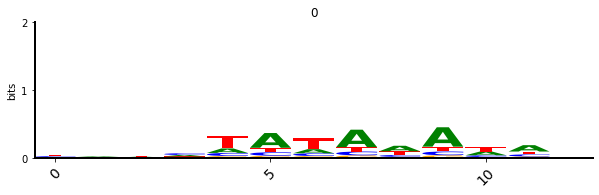

In [157]:
eu.pl.lm_filter_viz(
    sdata,
    filter_id=0
)

Plotting and saving filters 1-32
Plotting and saving filters 33-64
Plotting and saving filters 65-96
Plotting and saving filters 97-128
Plotting and saving filters 129-160
Plotting and saving filters 161-192
Plotting and saving filters 193-224
Plotting and saving filters 225-256


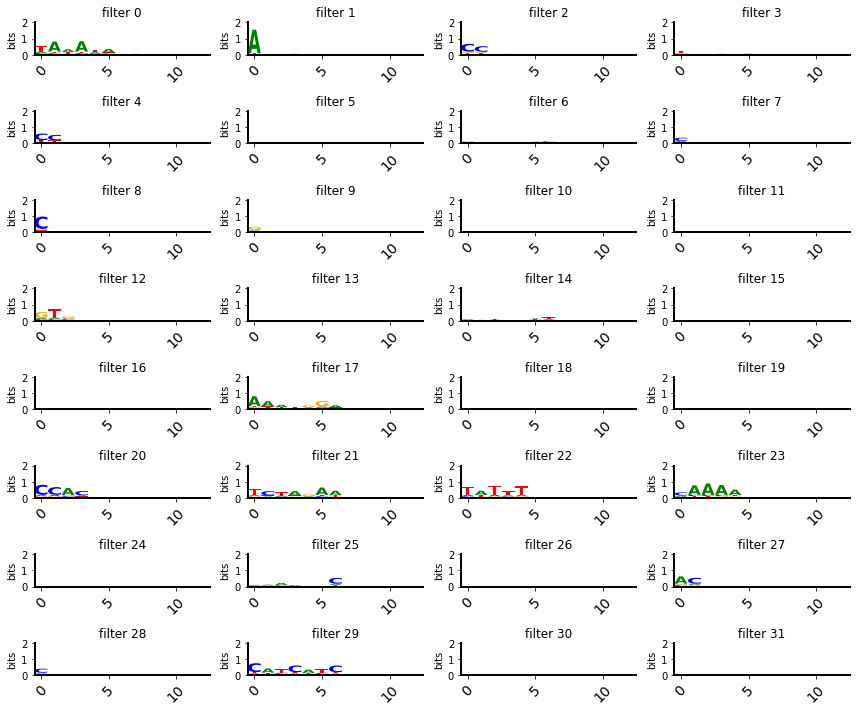

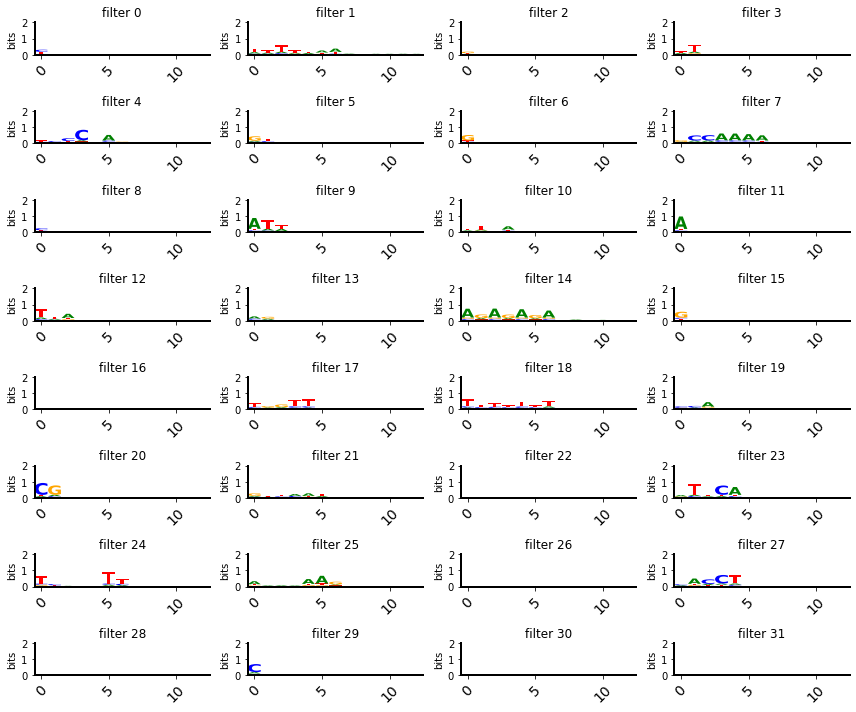

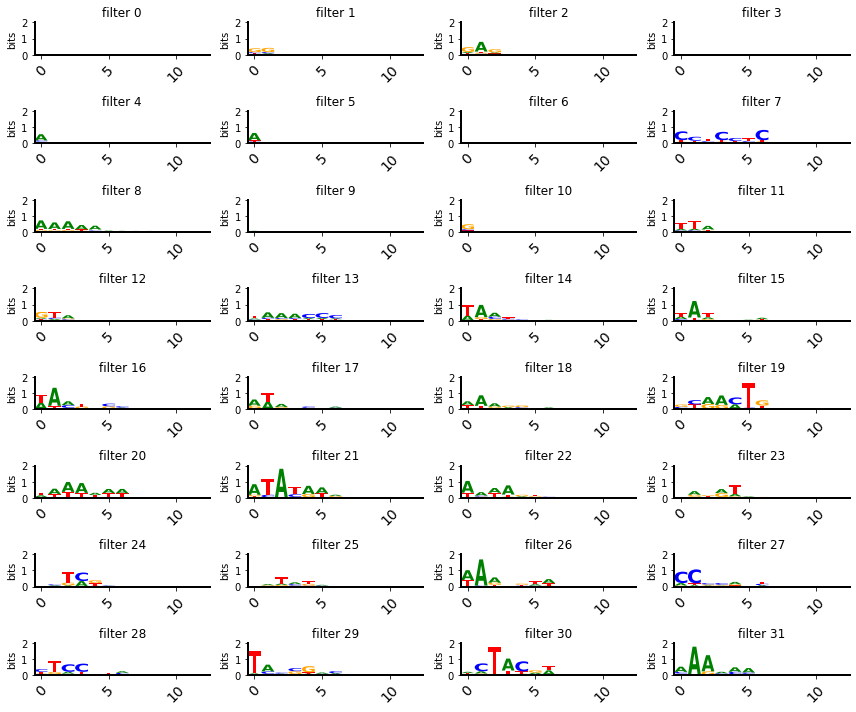

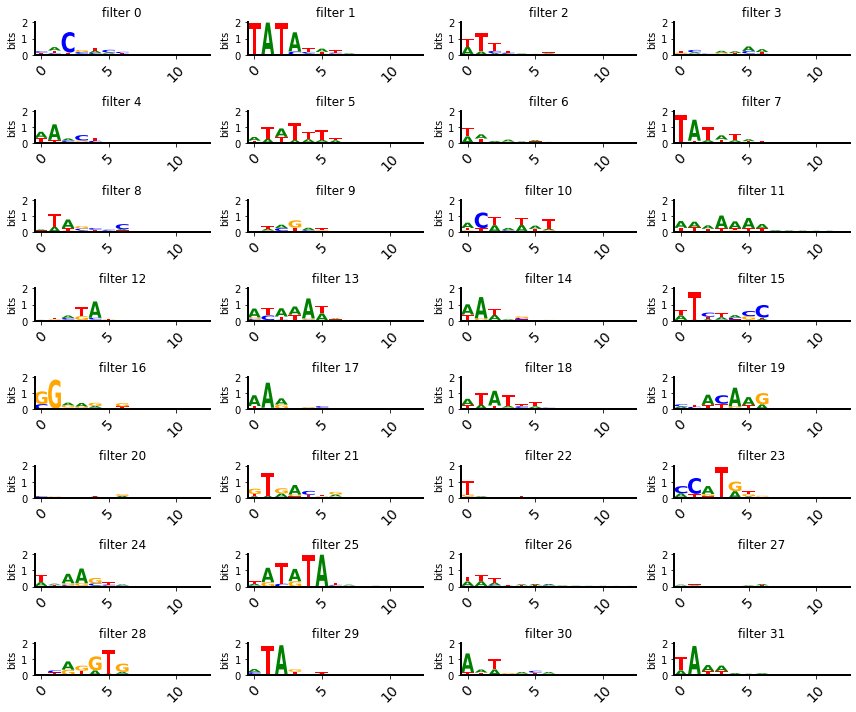

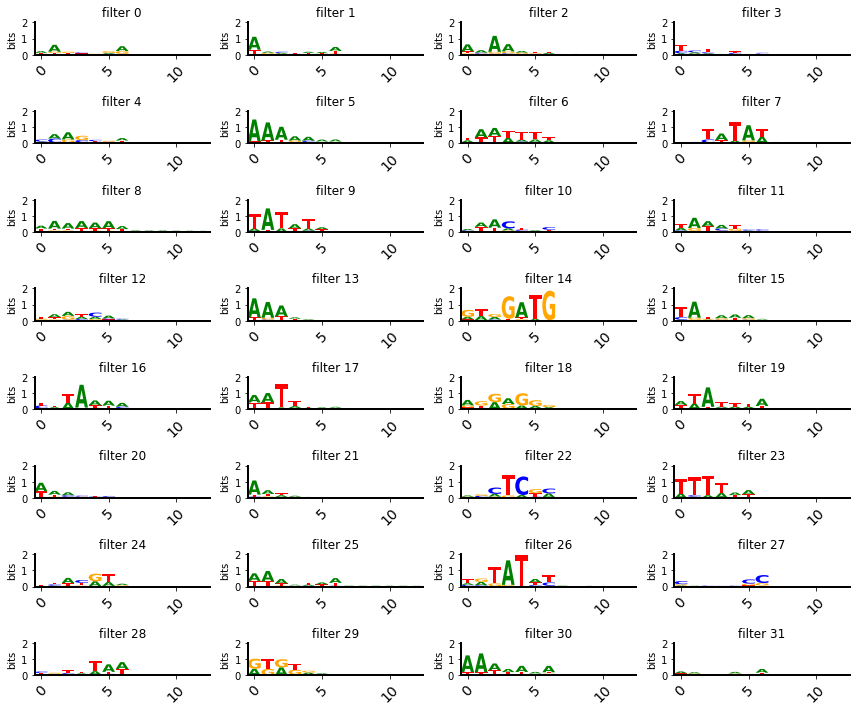

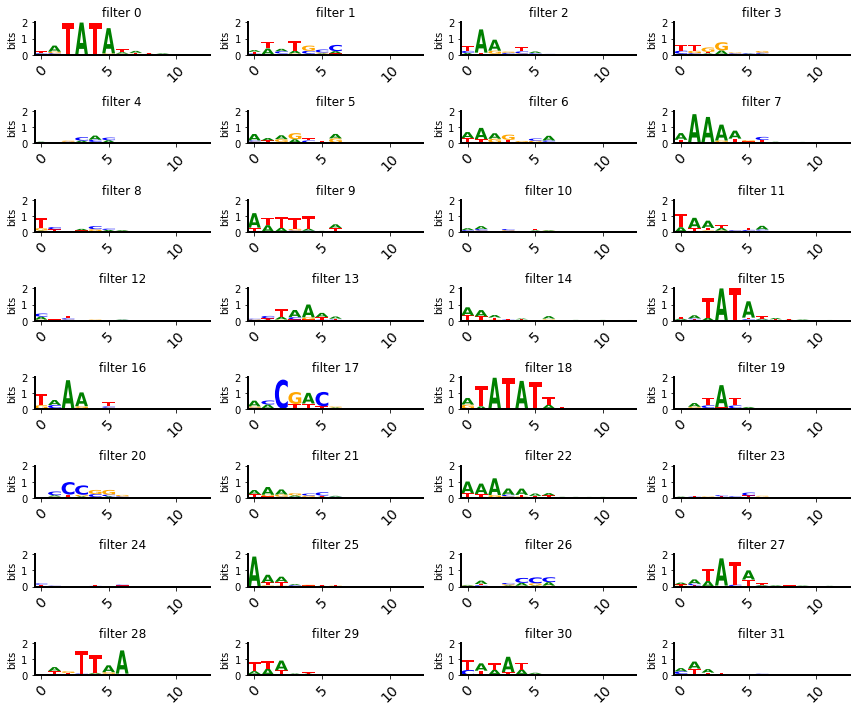

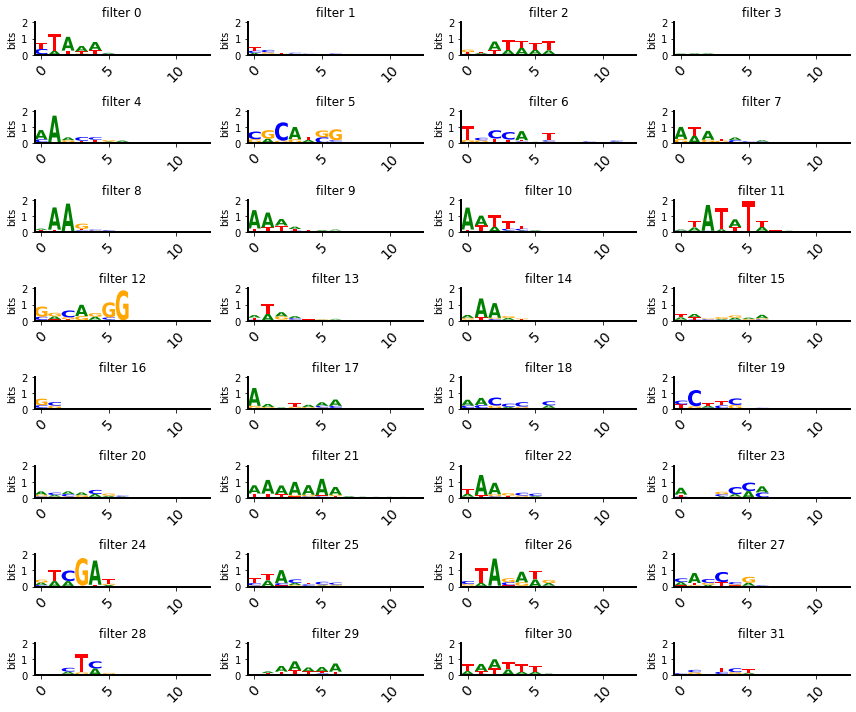

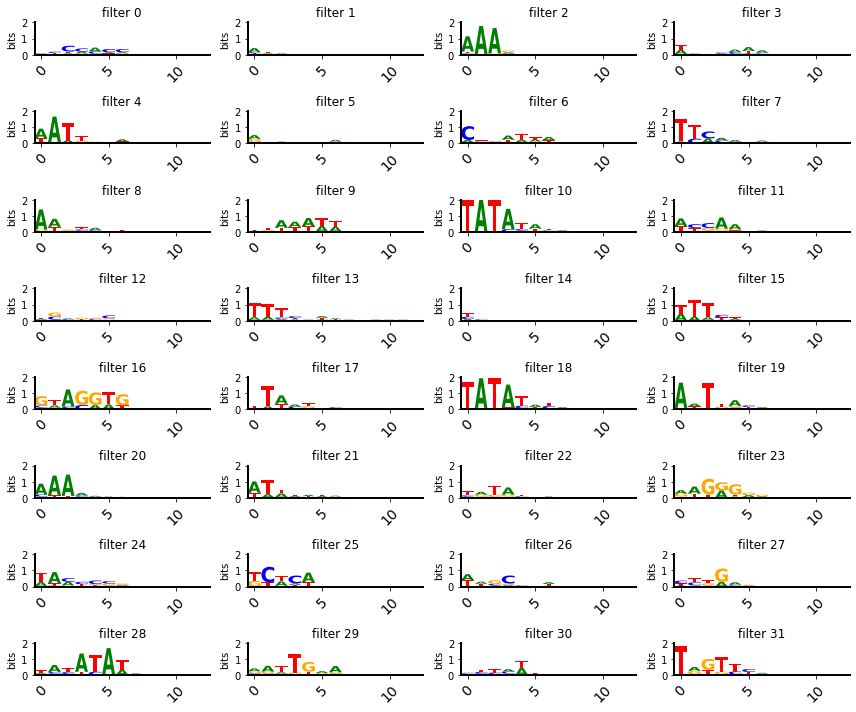

In [15]:
# TODO: turn into a function that plots all the filters in groups specified by user
for i in range(8):
    start_filter = i*32
    end_filter = (i*32) + 32
    print(f"Plotting and saving filters {start_filter+1}-{end_filter}")
    eu.pl.lm_multifilter_viz(
        sdata,
        filter_ids=list(sdata.uns["pfms"].keys())[start_filter:end_filter],
        num_rows=8,
        num_cols=4,
        titles=[f"filter {i}" for i in range(32)],
        save=os.path.join(figure_dir, f"{name}_best_model_filters{start_filter+1}-{end_filter}_viz.pdf")
    )

In [17]:
sdata.write_h5sd(os.path.join(eu.settings.output_dir, f"{name}_test_predictions_and_interpretations.h5sd"))

## In silico interpretation

In [52]:
sdata_evolve = eu.dl.read_csv(os.path.join(eu.settings.dataset_dir, "promoters_for_evolution.tsv"), seq_col="sequence", name_col="name")
sdata_evolve

SeqData object with = 310 seqs
seqs = (310,)
names = (310,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None

In [53]:
eu.pp.one_hot_encode_data(sdata_evolve)

One-hot-encoding sequences:   0%|          | 0/310 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 310 ohe_seqs added


In [54]:
model.to("cuda") #TODO

Hybrid(
  (hp_metric): R2Score()
  (convnet): BasicConv1D(
    (module): Sequential(
      (0): Conv1d(4, 256, kernel_size=(13,), stride=(1,))
      (1): ReLU()
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.3, inplace=False)
      (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv1d(256, 256, kernel_size=(13,), stride=(1,))
      (6): ReLU()
      (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Dropout(p=0.3, inplace=False)
      (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): Conv1d(256, 256, kernel_size=(13,), stride=(1,))
      (11): ReLU()
      (12): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (13): Dropout(p=0.3, inplace=False)
      (14): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (recurren

In [55]:
eu.interpret.evolve_sdata(
    model,
    sdata_evolve,
    rounds=3
)
eu.interpret.evolve_sdata(
    model,
    sdata_evolve,
    rounds=5
)
eu.interpret.evolve_sdata(
    model,
    sdata_evolve,
    rounds=10
)

cuda


Evolving seqs:   0%|          | 0/310 [00:00<?, ?it/s]

cuda


Evolving seqs:   0%|          | 0/310 [00:00<?, ?it/s]

cuda


Evolving seqs:   0%|          | 0/310 [00:00<?, ?it/s]

In [58]:
sdata_evolve

SeqData object with = 310 seqs
seqs = (310,)
names = (310,)
rev_seqs = None
ohe_seqs = (310, 170, 4)
ohe_rev_seqs = None
seqs_annot: 'target', 'original_scores', 'evolved_3_scores', 'evolved_5_scores', 'evolved_10_scores'
pos_annot: None
seqsm: None
uns: None

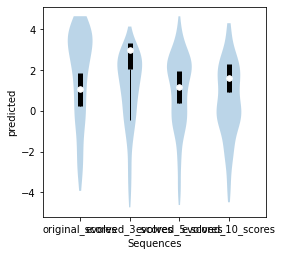

In [59]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sequences')
    ax.set_ylabel('predicted')

keys=["original_scores", "evolved_3_scores", "evolved_5_scores", "evolved_10_scores"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharey=True)
data = sdata_evolve.seqs_annot[keys].values
parts = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
set_axis_style(ax, keys)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [64]:
import seaborn as sns

In [80]:
def violin_long(
    sdata,
    groups,
    xlabel="variable",
    ylabel="value",
    save=None
):
    if isinstance(groups, str):
        groups=[groups]
    long_evolve = sdata.seqs_annot.melt(value_vars=groups)
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    sns.violinplot(data=long_evolve, x="variable", y="value", ax=ax)
    sns.stripplot(data=long_evolve, x="variable", y="value", color="black", ax=ax)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    if save:
        plt.savefig(save)

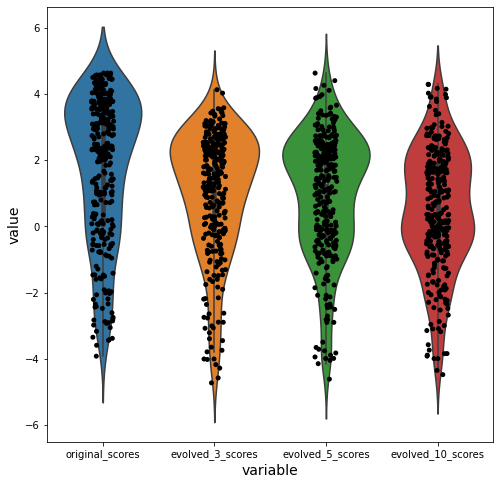

In [81]:
violin_long(
    sdata_evolve, 
    groups=["original_scores", "evolved_3_scores", "evolved_5_scores", "evolved_10_scores"], 
    save=os.path.join(figure_dir, f"{name}_best_model_evolution_summary.pdf")
)

---

# Scratch

In [ ]:
import logomaker as lm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

def lm_seq_track(
    sdata,
    seq_id=None,
    uns_key=None,
    highlights: list = [],
    highlight_colors: list = ["lavenderblush", "lightcyan", "honeydew"],
    ylabel = "Saliency",
    title="",
    return_ax: bool = False,
    save=None,
    **kwargs
):
    if isinstance(highlight_colors, str):
        highlight_colors = [highlight_colors] * len(highlights)

    # Get the sequence and annotations
    seq_idx = np.where(sdata.seqs_annot.index == seq_id)[0][0]
    seq = sdata.seqs[seq_idx]
    imp_scores = sdata.uns[uns_key][seq_idx] if uns_key in sdata.uns.keys() else None
    viz_seq = pd.DataFrame(imp_scores.T, columns=["A", "C", "G", "T"])
    viz_seq.index.name = "pos"
    y_max = np.max(viz_seq.values)
    y_min = np.min(viz_seq.values)
    nn_logo = lm.Logo(
        viz_seq,
        **kwargs
    )

    # style using Logo methods
    nn_logo.style_spines(visible=False)
    nn_logo.style_spines(spines=['left'], visible=True, bounds=[y_min, y_max])

    # style using Axes methods
    nn_logo.ax.set_xlim([0, len(viz_seq)])
    nn_logo.ax.set_xticks([])
    nn_logo.ax.set_ylim([y_min, y_max])
    nn_logo.ax.set_ylabel(ylabel)
    nn_logo.ax.set_title(title)
    for i, highlight in enumerate(highlights):
        nn_logo.highlight_position_range(pmin=highlight[0], pmax=highlight[1], color=highlight_colors[i])
    if return_ax:
        return nn_logo.ax
    if save is not None:
        plt.savefig(save)


def lm_multiseq_track(
    sdata,
    seq_ids: list,
    uns_keys: str = None,
    ylabels: list = None,
    width=None,
    height=None,
    return_axes: bool = False,
    save: str = None,
    **kwargs
):
    if isinstance(seq_ids, str):
        seq_ids = [seq_ids]
    if isinstance(uns_keys, str):
        uns_keys = [uns_keys]
    if isinstance(ylabels, str):
        ylabels = [ylabels]
    ylabels = ylabels if ylabels is not None else ["Importance Score"] * len(uns_keys)
    fig_width = len(seq_ids) * int(170 / 20) if width is None else width # make each sequence width proportional to its length and multiply by the number of sequences
    fig_height = len(uns_keys)*4 if height is None else height # make each sequence height proportional to the number of uns_keys
    _, ax = plt.subplots(len(uns_keys), len(seq_ids), figsize=(fig_width, fig_height))
    for i, uns_key in tqdm(enumerate(uns_keys), desc=f"Importance values", position=0):
        for j, seq_id in enumerate(seq_ids):
            lm_seq_track(
                sdata,
                seq_id=seq_id,
                uns_key=uns_key,
                ax=ax.flatten()[i*len(seq_ids)+j],
                ylabel=ylabels[i],
                title=seq_id,
                save=None,
                **kwargs
            )

    plt.tight_layout()
    if return_axes:
        return ax
    if save is not None:
        plt.savefig(save)

In [ ]:
import matplotlib.pyplot as plt
from eugene.plotting._seq import _plot_seq_logo
from tqdm.auto import tqdm
uns_keys = [method + "_imps" for method in ["InputXGradient", "DeepLift", "GradientSHAP", "NaiveISM"]]
ylabels = ["InputXGradient", "DeepLift", "GradientSHAP", "NaiveISM"]
seq_id = sdata.names[:2]
if isinstance(seq_id, str):
    seq_id = [seq_id]
if isinstance(uns_keys, str):
    uns_keys = [uns_keys]
seq_idx = np.where(sdata.seqs_annot.index.isin(seq_id))[0]
seqs = sdata.seqs[seq_idx]
print(seq_id, uns_keys, seq_idx, seqs)
fig_width = len(seq_id) * int(len(seqs[0]) / 20) # make each sequence width proportional to its length and multiply by the number of sequences
fig_height = len(uns_keys)*6
_, ax = plt.subplots(len(uns_keys), len(seq_id), figsize=(fig_width, fig_height))
for i, uns_key in tqdm(enumerate(uns_keys), desc=f"Importance values", position=0):
    for j, seq in tqdm(enumerate(seqs), desc=f"Plotting sequence", position=1):
        imp_scores = sdata.uns[uns_key][seq_idx[j]] if uns_key in sdata.uns.keys() else None
        _plot_seq_logo(
            ax.flatten()[i*len(seq_id)+j],
            seq,
            imp_scores=imp_scores,
            ylab=ylabels[i],
        )
        if i == 0:
            print(j*len(uns_keys))
            ax.flatten()[i*len(seq_id)+j].set_title(seq_id[j], fontsize=18, weight="bold")
plt.tight_layout()

In [ ]:
cpm = seqlogo.CompletePm(pfm=sdata_leaf.uns["pfms"][0])
print(cpm)
scaled_cpm = cpm.ppm.multiply(cpm.ic, axis=0)
logo = seqlogo.seqlogo(cpm, ic_scale=True, format="png")
display(logo)

In [ ]:
info_mat = logomaker.transform_matrix(pfm, 
                                      from_type='counts', 
                                      to_type='information')                                      
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12,10))
for i in range(num_rows):
    for j in range(num_cols):
        filter_id = filter_ids[i*num_cols+j]
        pfm=sdata_leaf.uns["pfms"][filter_id]
        info_mat = logomaker.transform_matrix(
            pfm, 
            from_type='counts', 
            to_type='information')
        logo = logomaker.Logo(
            info_mat,
            font_name = 'Arial Rounded MT Bold',
            ax=ax[i,j])
        logo.style_xticks(spacing=5, anchor=25, rotation=45, fmt='%d', fontsize=14)
        logo.style_spines(visible=False)
        logo.style_spines(spines=['left','bottom'], visible=True, linewidth=2)

        logo.ax.set_ylim([0, 2])
        logo.ax.set_yticks([0, 1, 2])
        logo.ax.set_yticklabels(['0', '1', '2'])
        logo.ax.set_ylabel('bits')
plt.tight_layout()
plt.savefig('../../_output/jores21/pfms.pdf')

In [ ]:
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12,10))
for i in range(num_rows):
    for j in range(num_cols):
        ax[i,j].imshow(imread(os.path.join(eu.settings.output_dir, "fig", f"leaf_filter_{i*num_cols+j}.png")))
        #ax[i,j].axis('off')
#plt.savefig(os.path.join(eu.settings.output_dir, "fig", "leaf_filters.pdf"))

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files):
    fig = figure(figsize=(20,10))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

import glob
showImagesHorizontally(glob.glob("../../_output/jores21/fig/*filter*.png"))

In [ ]:
for filter_id in filter_ids:
    pfm=sdata_leaf.uns["pfms"][filter_id]
    cpm = seqlogo.CompletePm(pfm=pfm)
    logo = seqlogo.seqlogo(
        cpm, 
        ic_scale=True, 
        format="png", 
        size="xlarge",
        filename=os.path.join(eu.settings.output_dir, "fig", f"leaf_filter_{filter_id}.png")
    )
    

No importance scores given, outputting just sequence
No importance scores given, outputting just sequence


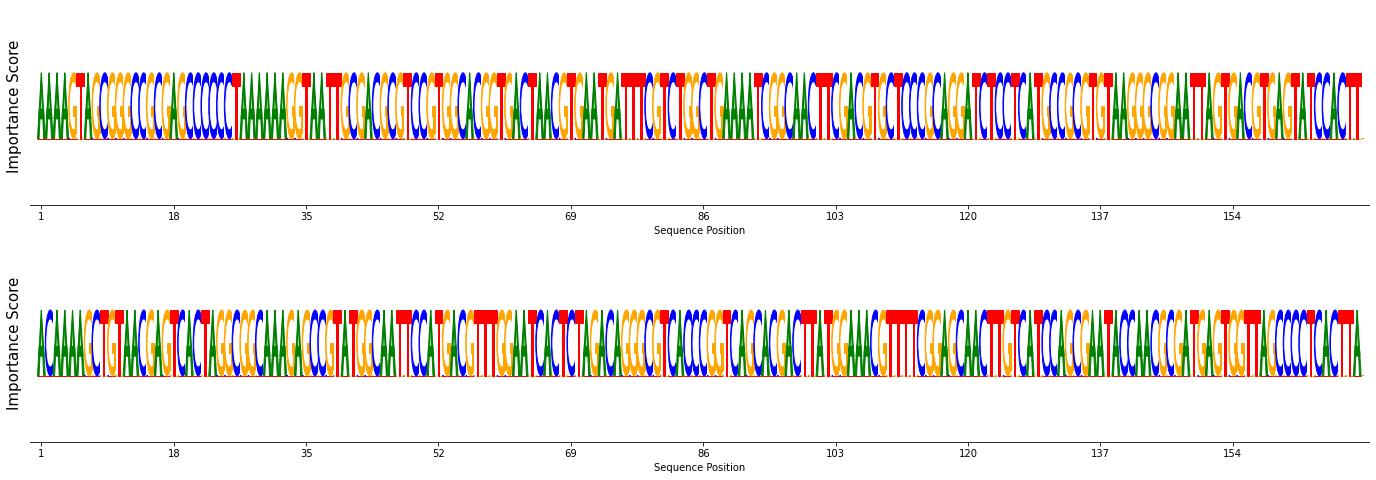

In [ ]:
from eugene.plotting._seq import _plot_seq_logo
fig, ax = plt.subplots(2, 1, figsize=(24, 8))
_plot_seq_logo(ax[1], sdata_evolve.seqs[10])
_plot_seq_logo(ax[0], eu.pp.decode_DNA_seq(evolved_seq[0]))